In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import ps_post_patch as pp #post patch script

#sns.set_style('whitegrid') #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context('notebook')

In [2]:
#Still working on how to use for dataframes
class my_dataframe():
    """Create a class in a usable way for the dataframe."""
    pass

In [3]:
def get_ps_df():
    """To read the Patchseq Google Doc as a pandas dataframe.

    Returns:
        ps_df: pandas dataframe
    """
    
    ps_df = pd.read_csv("C:/users/ramr/documents/github/coding/personal-projects/csv/ps_mouse.csv")
    
    ps_df.dropna(subset = ["Lims tube id"], inplace = True)
    ps_df = ps_df[ps_df["Lims tube id"].str.match('PA')]
    ps_df = pp.postpatch_reclass(ps_df)
    
    ps_df = ps_df.loc[:, ["Date", 
                          "User", 
                          "Region", 
                          "Layer", 
                          "Depth (um)", 
                          "patch duration",
                          "extraction pressure applied (mbar)", 
                          "post_patch", 
                          "Resolution index", 
                          "SM_QC_PF", 
                          "Lims tube id"]]
    #Optional columns     
    #"Post patch?", "Post patch pipette R", 
    #"Pipette size (MOhms)", "Nucleus sucked in?", "SM_QC_PF", "Time to Entire-Cell", "File", "63x go no go"
    return ps_df

In [4]:
def sort_date(df):
    """To sort the date column in ps_df.
    
    Parameters:
        df: pandas dataframe
    
    Returns:
        df: pandas dataframe
    """
        
    #Changing to string to add 20 in front of strings within date column
    df['Date'] = df['Date'].astype('str')
    df['Date'] = '20' + df['Date']
    df['Date'] = pd.to_datetime(df['Date']) #Converting date to YYYY-MM-DD
    df = df.set_index('Date') #Set date column as index column

    #Production Date Start = '2017-10-01' 
    start_date = '2017-10-01'
    df = df[start_date:] #Choosing start & end date  
    df.sort_index(inplace = True)
    df.reset_index(inplace = True)
    return df 

In [5]:
def piv_table(ps_df):
    """To create a pivot table using ps_df.
    
    Parameters:
        ps_df: pandas dataframe
    
    Returns:
        ps_df1: pandas dataframe
    """
    
    ps_df1 = ps_df.loc[:,['post_patch', 'Resolution index']]
    ps_df1 = ps_df1.groupby('post_patch').count()
    ps_df1 = ps_df1.rename(columns = {'Resolution index' : 'count'})
    ps_df1 = ps_df1.pivot_table(values=['count'], index=['post_patch'], aggfunc='sum')
    return ps_df1

In [6]:
def pie_plot(ps_df1):
    """To create a pie plot using ps_df1.
    
    Parameters:
        ps_df1: pivot table
    
    Returns: None
    """
    
    #plt.figure(1)-not sure how this works
    
    explode = (0.05, 0.05, 0.05, 0.05, 0.05) #splits the categories
    
    ps_df1.plot.pie(y = 'count', autopct='%1.1f%%', figsize = (8,8), shadow = True, legend = False, 
                 explode = explode, colors = ['#f7fcb9','#fc9272', '#de2d26', '#31a354', '#a1d99b'])
    
    #Colors = Entire(Yellow), No-high(Light Red), No-low(Red), Nuc-high(Green), Nuc-low(Light Green)
    
    plt.title('Post Patch Percentage', loc = 'center', fontsize = 14)
    plt.axes().set_ylabel('')

In [7]:
#Making global variables
ps_df = get_ps_df()
ps_df = sort_date(ps_df)
ps_df1 = piv_table(ps_df)

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
ps_df.head()

,Date,User,Region,Layer,Depth (um),patch duration,extraction pressure applied (mbar),post_patch,Resolution index,SM_QC_PF,Lims tube id
0,2017-10-02,PA,None,None,NaN,11.866667,-35.0,No-low seal,0.562351,pass,PAS4_171002_451_A01
1,2017-10-03,PA,VISp,5,NaN,14.483333,-34.0,Nuc-high seal,1.000000,pass,PAS4_171003_451_A01
2,2017-10-03,PA,VISp,3,NaN,12.500000,-32.0,Nuc-high seal,0.797261,pass,PAS4_171003_452_A01
3,2017-10-04,PA,VISp,3,NaN,13.216667,-25.0,Nuc-low seal,1.000000,pass,PAS4_171004_451_A01
4,2017-10-04,PA,VISp,3,NaN,14.350000,-35.0,Nuc-high seal,1.000000,pass,PAS4_171004_453_A01


In [9]:
ps_df.tail()

,Date,User,Region,Layer,Depth (um),patch duration,extraction pressure applied (mbar),post_patch,Resolution index,SM_QC_PF,Lims tube id
431,2018-07-25,PA,VISp,4,52.4,13.850000,-35.0,Nuc-low seal,NaN,NaN,PAS4_180725_451_A01
432,2018-07-25,PA,VISp,6a,72.6,11.583333,-23.0,Nuc-high seal,NaN,NaN,PAS4_180725_455_A01
433,2018-07-25,PA,VISp,5,42.6,12.133333,-30.0,No-high seal,NaN,NaN,PAS4_180725_453_A01
434,2018-07-25,PA,VISp,6a,56.4,12.533333,-20.0,Nuc-low seal,NaN,NaN,PAS4_180725_454_A01
435,2018-07-25,PA,VISp,4,69.4,9.466667,-30.0,Nuc-high seal,NaN,NaN,PAS4_180725_452_A01


In [10]:
#Outputing dataframe as excel sheet
#writer = pd.ExcelWriter('TITLE.xlsx')
#dataframe.to_excel(writer, 'Sheet#)

writer = pd.ExcelWriter('my_ps_df.xlsx')
ps_df.to_excel(writer, 'Sheet1')
writer.save()

### Plots

In [11]:
ps_df1

,count
post_patch,
Entire cell,12
No-high seal,11
No-low seal,68
Nuc-high seal,187
Nuc-low seal,72


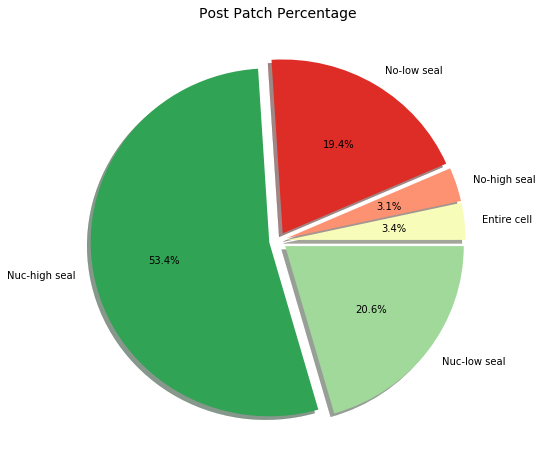

In [12]:
pie_plot(ps_df1)

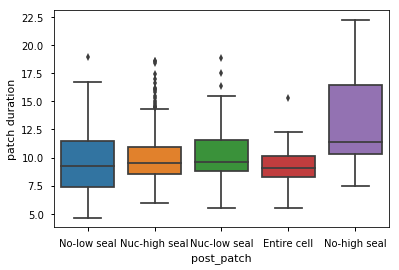

In [21]:
sns.boxplot(x = 'post_patch', y = 'patch duration', data = ps_df)

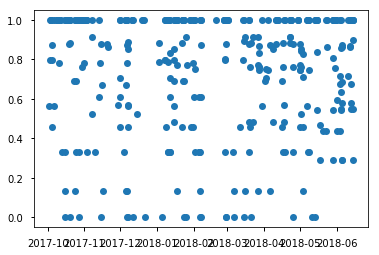

In [13]:
plt.plot_date(x = 'Date', y = 'Resolution index', data = ps_df)